# this is a customer segmantation model used to predict which age group prefers which method and which product using data visulaization and Machine learning algorithms.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# from imblearn.over_sampling import SMOTE
import xgboost as xgb

In [2]:
df = pd.read_csv("shopping_trends.csv")
df.head()
# df.shape

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
df_main = df[["Age", "Gender", "Item Purchased", "Category", "Payment Method", "Color"]]
df_main.head()

,Age,Gender,Item Purchased,Category,Payment Method,Color
0,55,Male,Blouse,Clothing,Credit Card,Gray
1,19,Male,Sweater,Clothing,Bank Transfer,Maroon
2,50,Male,Jeans,Clothing,Cash,Maroon
3,21,Male,Sandals,Footwear,PayPal,Maroon
4,45,Male,Blouse,Clothing,Cash,Turquoise


In [4]:
# df_main_clean = df_main.dropna()
# df_main_clean

In [5]:
# grouping the data as per Age
df_age = df_main.sort_values(by=['Age'])
# df_age

In [6]:
# print(df_main_clean['Age'].value_counts()[18])
# print(df_main_clean['Preferred Payment Method'].value_counts()["Cash"])

In [7]:
# # Define bins and labels
# bins = [0, 20, 30, 40, 50, 60, 70]
# labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']

# df_age['Age Group'] = pd.cut(df_main_clean['Age'], bins=bins, labels=labels, right=False)
# df_age[['Age Group', 'Age']].head(100)
# Group by Age Group and Preferred Payment Method
grouped = df_main.groupby(['Age', 'Payment Method']).size().unstack(fill_value=0)
df_grouped = grouped
df_grouped.head()

Payment Method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Venmo
Age,,,,,,
18,15,16,9,13,9,7
19,13,15,18,12,15,8
20,7,11,11,8,16,9
21,8,13,11,15,11,11
22,16,8,10,9,10,13


In [8]:
total_bt = df_grouped["Bank Transfer"].sum()
total_c = df_grouped["Cash"].sum()
total_cc = df_grouped["Credit Card"].sum()
total_db = df_grouped["Debit Card"].sum()
total_pp = df_grouped["PayPal"].sum()
total_v = df_grouped["Venmo"].sum()

payment_stats = {
    "total bank transfer payments": [total_bt], 
    "total cash": [total_c], 
    "total credit card": [total_cc], 
    "total debit card": [total_db], 
    "total paypal": [total_pp], 
    "total venmo": [total_v],
}

pd.DataFrame(payment_stats)

,total bank transfer payments,total cash,total credit card,total debit card,total paypal,total venmo
0,632,648,696,633,638,653


In [9]:
count_18_to_29 = df_main[(df_main['Age'] >= 18) & (df_main['Age'] < 30)].shape[0]
count_30_to_39 = df_main[(df_main['Age'] >= 30) & (df_main['Age'] < 40)].shape[0]
count_40_to_49 = df_main[(df_main['Age'] >= 40) & (df_main['Age'] < 50)].shape[0]
count_50_to_59 = df_main[(df_main['Age'] >= 50) & (df_main['Age'] < 60)].shape[0]
count_60_to_70 = df_main[(df_main['Age'] >= 60) & (df_main['Age'] <= 70)].shape[0]

age_group_count = {
    "18-29":[count_18_to_29],
    "30-39":[count_30_to_39],
    "40-49":[count_40_to_49],
    "50-59":[count_50_to_59],
    "60-70":[count_60_to_70],
}
pd.DataFrame(age_group_count)

,18-29,30-39,40-49,50-59,60-70
0,878,724,739,771,788


In [10]:
# Define bins and labels for age groups
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-29', '30-39', '40-49', '50-59', '60-70']

# Create 'Age Group' column
df_main['Age Group'] = pd.cut(df_main['Age'], bins=bins, labels=labels, right=False)

# Group by 'Age Group' and count occurrences
age_group_counts = df_main.groupby('Age Group').size().reset_index(name='Count')

# Display the table
age_group_counts.head()

C:\Users\siddh\AppData\Local\Temp\ipykernel_1740\2425931153.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['Age Group'] = pd.cut(df_main['Age'], bins=bins, labels=labels, right=False)


,Age Group,Count
0,18-29,878
1,30-39,724
2,40-49,739
3,50-59,771
4,60-70,721


In [11]:
# Define bins and labels for age groups
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-29', '30-39', '40-49', '50-59', '60-70']

# Create 'Age Group' column
df_main['Age Group'] = pd.cut(df_main['Age'], bins=bins, labels=labels, right=False)

# Group by 'Age Group' and 'Preferred Payment Method' and count occurrences
payment_method_by_age_group = df_main.groupby(['Age Group', 'Payment Method']).size().unstack(fill_value=0)

# Display the table
payment_method_by_age_group

C:\Users\siddh\AppData\Local\Temp\ipykernel_1740\4046845399.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['Age Group'] = pd.cut(df_main['Age'], bins=bins, labels=labels, right=False)


Payment Method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Venmo
Age Group,,,,,,
18-29,148,141,141,153,157,138
30-39,122,124,135,113,106,124
40-49,109,113,138,131,130,118
50-59,130,137,136,121,122,125
60-70,112,116,136,109,112,136


In [12]:
# Define bins and labels for age groups
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-29', '30-39', '40-49', '50-59', '60-70']

# Create 'Age Group' column
df_main['Age Group'] = pd.cut(df_main['Age'], bins=bins, labels=labels, right=False)

# Group by 'Age Group' and 'Preferred Payment Method' and count occurrences
category_by_age_group = df_main.groupby(['Age Group', 'Category']).size().unstack(fill_value=0)

# Display the table
category_by_age_group

C:\Users\siddh\AppData\Local\Temp\ipykernel_1740\891532819.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['Age Group'] = pd.cut(df_main['Age'], bins=bins, labels=labels, right=False)


Category,Accessories,Clothing,Footwear,Outerwear
Age Group,,,,
18-29,275,404,127,72
30-39,247,319,106,52
40-49,225,329,114,71
50-59,229,339,142,61
60-70,239,320,98,64


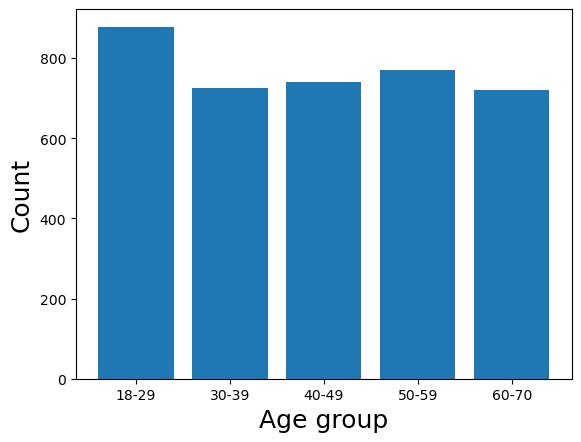

In [13]:
x = age_group_counts["Age Group"]
y = age_group_counts["Count"]
plt.xlabel('Age group', fontsize=18)
plt.ylabel('Count', fontsize=18)

plt.bar(x,y)
plt.show()

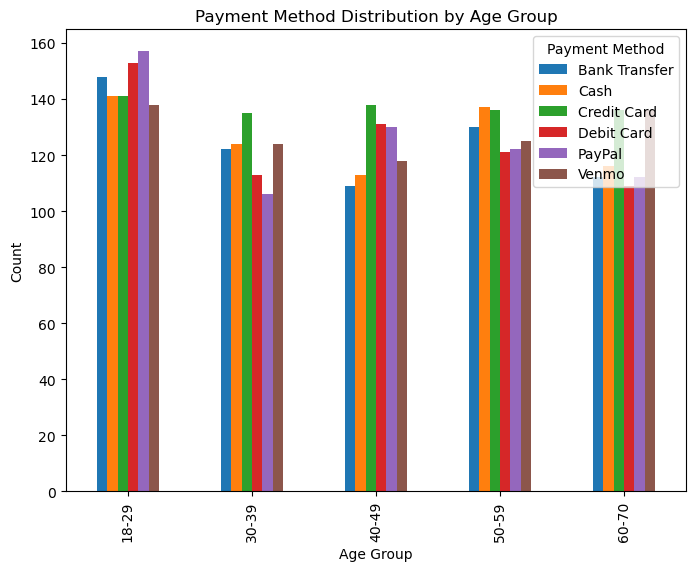

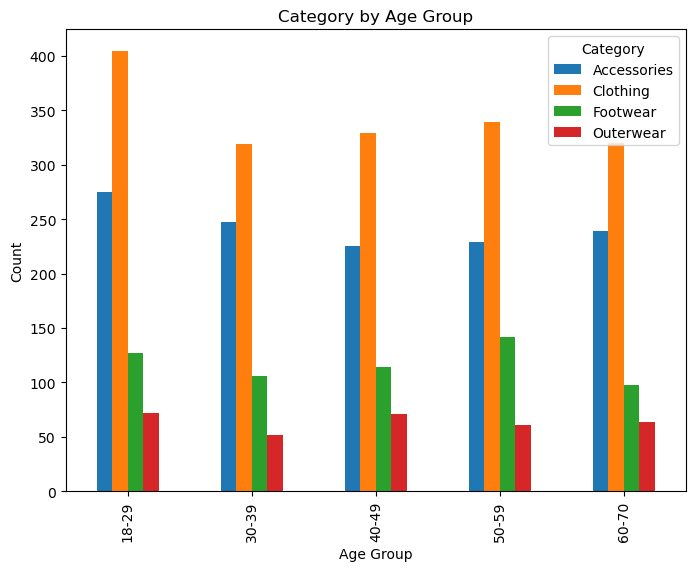

In [14]:
# Bar graph
payment_method_by_age_group.plot.bar(figsize=(8, 6))
plt.title('Payment Method Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Payment Method')
plt.show()

# Bar graph
category_by_age_group.plot.bar(figsize=(8, 6))
plt.title('Category by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Category')
plt.show()

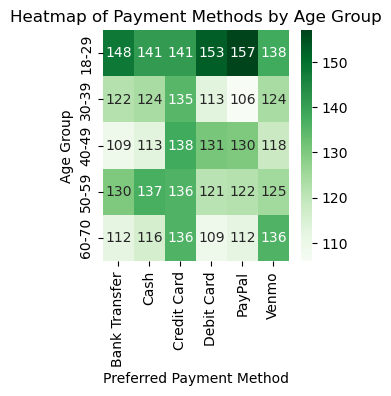

In [15]:
# Draw a heatmap
plt.figure(figsize=(3, 3))
sn.heatmap(payment_method_by_age_group, annot=True, fmt='d', cmap='Greens')
plt.title('Heatmap of Payment Methods by Age Group')
plt.xlabel('Preferred Payment Method')
plt.ylabel('Age Group')
plt.show()

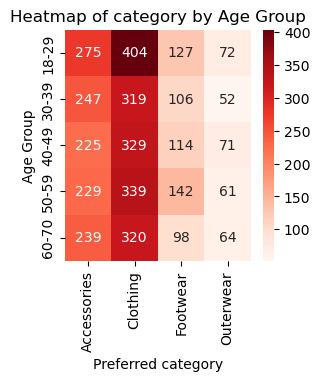

In [16]:
plt.figure(figsize=(3, 3))
sn.heatmap(category_by_age_group, annot=True, fmt='d', cmap='Reds')
plt.title('Heatmap of category by Age Group')
plt.xlabel('Preferred category')
plt.ylabel('Age Group')
plt.show()

# using ML algo to predict payment method and categories amoung different ages.

In [17]:
df_main = df_main.dropna()

# Encode categorical variables
label_encoders = {}
for column in ['Gender', 'Item Purchased', 'Category', 'Payment Method', 'Color']:
    le = LabelEncoder()
    df_main[column] = le.fit_transform(df_main[column])
    label_encoders[column] = le

# Define features and target variable
X = df_main[['Age']]
y = df_main['Payment Method']

V = df_main[['Age']]
w = df_main['Category']

# prediction based on Age and Payment method

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.17992177314211213


In [19]:
from sklearn.ensemble import RandomForestClassifier

X = df_main[['Age', 'Gender', 'Item Purchased', 'Category', 'Color']]
y = df_main['Payment Method']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.1408083441981747
Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.14      0.13       111
           1       0.11      0.12      0.11       115
           2       0.16      0.17      0.17       135
           3       0.15      0.15      0.15       129
           4       0.22      0.17      0.19       150
           5       0.10      0.09      0.09       127

    accuracy                           0.14       767
   macro avg       0.14      0.14      0.14       767
weighted avg       0.15      0.14      0.14       767



# prediction based on Age and Category

In [38]:
V_train, V_test, w_train, w_test = train_test_split(V, w, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=100)

model.fit(V_train, w_train)

w_pred = model.predict(V_test)

accuracy = accuracy_score(w_test, w_pred)

print(f'Accuracy: {accuracy*100}')

Accuracy: 98.04432855280312


C:\Users\siddh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.ensemble import RandomForestClassifier

V = df_main[['Age', 'Gender', 'Item Purchased', 'Category', 'Color']]
w = df_main['Category']

V_train, V_test, w_train, w_test = train_test_split(V, w, test_size=0.2, random_state=4)

model = RandomForestClassifier(n_estimators=10, random_state=4)
model.fit(V_train, w_train)

w_pred = model.predict(V_test)

accuracy = accuracy_score(w_test, w_pred)
report = classification_report(w_test, w_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       233
           1       1.00      1.00      1.00       367
           2       1.00      1.00      1.00       103
           3       1.00      1.00      1.00        64

    accuracy                           1.00       767
   macro avg       1.00      1.00      1.00       767
weighted avg       1.00      1.00      1.00       767



In [27]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, V, w, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score: 1.0


C:\Users\siddh\AppData\Local\Temp\ipykernel_1740\3964018750.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_main.corr()


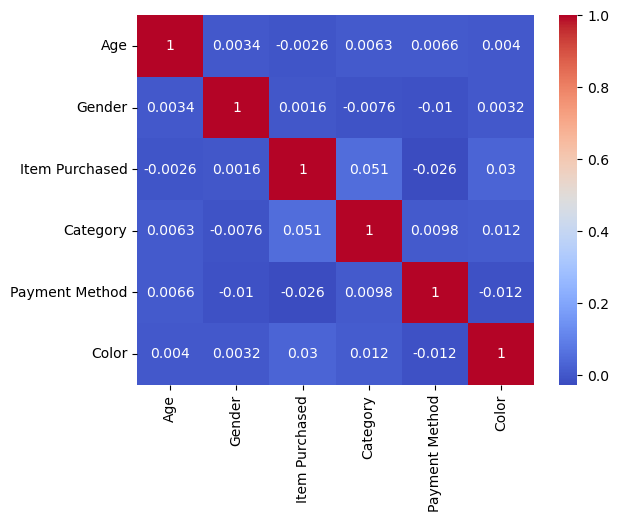

In [47]:
# Generate a heatmap
corr = df_main.corr()
sn.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()